<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hccho2/DL-UPMTP/blob/master/DL-TF-TORCH-CH8-Huggingface.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
!pip install transformers==4.25.1 --quiet
!pip install sentencepiece --quiet
!pip install datasets --quiet # hugging face datasets
!pip install Korpora --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 138.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 1.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 8.11 Hugging Face Transformers - BERT

## 8.11.1 Tokenizer


In [ ]:
import sentencepiece as spm
import glob

Vocabulary 생성

In [ ]:
parameter = '--input={} --model_prefix={} --vocab_size={} --model_type={} --user_defined_symbols={}'

# input_file = ','.join(glob.glob('./kowiki/*/*'))  # 936개 파일, wikiextractor.WikiExtractor 패키지로 추출.
input_file = 'wiki_kor_single_line.txt'  # 8.11.3에서 생성할 수 있다.  1G 크기.
vocab_size = 32000
prefix = 'sentpiece_wiki_bpe'
model_type = 'bpe'
user_defined_symbols = '[PAD],[UNK],[CLS],[SEP],[MASK]'
cmd = parameter.format(input_file, prefix, vocab_size, model_type,user_defined_symbols)

spm.SentencePieceTrainer.Train(cmd)  # 33분 ~ 1시간 소요.

In [ ]:
sp = spm.SentencePieceProcessor(model_file='sentpiece_wiki_bpe.model')

In [ ]:
s = '전기자동차를 타고 부산에 왔다.'
sp.EncodeAsPieces(s)

['▁전기', '자동차', '를', '▁타고', '▁부산', '에', '▁왔다', '.']

Transformers - BertTokenizer

In [ ]:
from transformers import BertTokenizer, BasicTokenizer
import json
import numpy as np

In [ ]:
# 2가지 방식으로 할 수 있다.

# 방법 1.
# vocab.txt를 자동으로 download
tokenizer = BertTokenizer.from_pretrained("klue/bert-base")

# 방법 2.
# 다운로드 받은 vocab과 config를 이용해서 tokenizer 생성하기
tokenizer_config = json.load(open('tokenizer_config_klue_bert_base.json','r',encoding='UTF8'))
tokenizer2 = BertTokenizer('vocab_klue_bert_base.txt',**tokenizer_config)

In [ ]:
tokenizer

PreTrainedTokenizer(name_or_path='klue/bert-base', vocab_size=32000, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
tokenizer2

PreTrainedTokenizer(name_or_path='', vocab_size=32000, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
s = '전기자동차를 타고 부산에 왔다.'
print(tokenizer.tokenize(s))
print(tokenizer2.tokenize(s))

['전기', '##자동차', '##를', '타고', '부산', '##에', '왔', '##다', '.']
['전기', '##자동차', '##를', '타고', '부산', '##에', '왔', '##다', '.']


Transformers - BasicTokenizer
- do_lower_case=False로 설정해야 한다.
- do_lower_case=True인 경우, 다음 issue 참고.
- https://github.com/google-research/bert/pull/228
- 한글 문장을 띄어쓰기, 구두점 단위로 분리해 준다.
- BasicTokenizer는 한글 문장을 대상으로 훈련된 from_pretrained tokenizer에 비해 단순한다.

In [ ]:
basic_tokenizer = BasicTokenizer(do_lower_case=False)

In [ ]:
print(basic_tokenizer.tokenize(s))
print(basic_tokenizer.tokenize("I'll be back."))

['전기자동차를', '타고', '부산에', '왔다', '.']
['I', "'", 'll', 'be', 'back', '.']


In [ ]:
input_ids = tokenizer("Hello, my dog is cute", add_special_tokens=True, return_tensors="tf")
input_ids

{'input_ids': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=
array([[    2, 13472, 10211,  2036,    16, 15408, 15238, 11376,    70,
        20669,     3]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

## 8.11.3 Pre-Training(transformers API 활용, Tensorflow, from scratch)

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

### tokenizer 만들기 - 영문 wiki
- wikitext-2-raw-v1: 12.91 MB
- wikitext-103-raw-v1: 523.97 MB

In [ ]:
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")  # 'wikitext' 아래에 있는 'wikitext-2-raw-v1'
all_texts_wiki = [ doc for doc in dataset["train"]["text"] if len(doc) > 0 and not doc.startswith(" =")]
print(f'lines: {len(all_texts_wiki)}')

In [ ]:
all_texts_wiki[:10]

In [ ]:
# "bert-base-cased"에서 구조만 가져온다.
old_tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")  # --> BertTokenizerFast

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def batch_iterator():
    for i in range(0, len(all_texts_wiki), 256):
        yield all_texts_wiki[i : i + 256]

new_tokenizer = old_tokenizer.train_new_from_iterator( batch_iterator(), vocab_size=25000)  # 10 소요

In [ ]:
new_tokenizer.save_pretrained('./tokenizer')

('./tokenizer/tokenizer_config.json',
 './tokenizer/special_tokens_map.json',
 './tokenizer/vocab.txt',
 './tokenizer/added_tokens.json',
 './tokenizer/tokenizer.json')

### tokenizer 만들기 - 한글 wiki

In [ ]:
! wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2

--2023-03-09 06:17:33--  https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.142, 2620:0:861:2:208:80:154:142
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 889750893 (849M) [application/octet-stream]
Saving to: ‘kowiki-latest-pages-articles.xml.bz2’

kowiki-latest-pages 100%[===================>] 848.53M  4.81MB/s    in 3m 33s  

2023-03-09 06:21:07 (3.98 MB/s) - ‘kowiki-latest-pages-articles.xml.bz2’ saved [889750893/889750893]



In [ ]:
# wiki_kor_single_line.txt(1G) 파일이 생성된다.
! python KorWikiExtractor.py kowiki-latest-pages-articles.xml.bz2 --outfile_name wiki_kor_single_line.txt --single_line # 14~20분 소요

File detected as being bzip2.
571000 7732 1978년
609000 8217 배문고등학교
947000 13523 테베 (이집트)
1269000 19468 730년대
1468000 23382 부팅
1538000 25888 폴 코언
1815000 31852 시간
1867000 32747 국가정치총국
2154000 37670 슘슈섬
2385000 41240 PN 접합
2456000 42664 러시아 루블
2756000 47862 빠
2773000 48287 위트레흐트주
2818000 49203 지뢰 찾기
2837000 49639 사쓰마반도
2944000 51428 이근명 (1840년)
3270000 60015 기원전 499년
3854000 72028 제왕운기
4005000 75331 맥 프로
4127000 77715 방정환
4198000 80105 지도
4295000 82458 Ё
4344000 83696 로베르트 무질
4364000 84125 유머레스크
4418000 85499 회귀 테스트
4422000 85665 Ixnay on the Hombre
4764000 93914 이스즈의 트럭
4883000 96748 일본 국가안전보장회의
5041000 99874 Nevermind
5078000 100648 마이크로소프트 머니
5100000 101051 수박 (무술)
5659000 113663 이정재 (1917년)
5924000 119914 오봉산 (춘천)
6004000 121248 독은기
6495000 131346 한연수 (방송인)
6499000 131453 정광고등학교
6684000 135891 다홍색
6994000 144191 이재원
7133000 147123 BBK 주가 조작 사건
7162000 147742 나 홀로 집에
7384000 152880 .qa
7387000 152970 .cr
7644000 158956 모하마드 자히르 샤
7732000 161022 삼례역
7739000 161198 프레임 릴레이
8005000 16787

In [ ]:
filename = 'wiki_kor_single_line.txt'
with open(filename,'r') as f:
    all_texts_wiki_kor = f.readlines()
all_texts_wiki_kor = [line.strip() for line in all_texts_wiki_kor if len(line.strip())>0]
print(f'lines: {len(all_texts_wiki_kor)}')

lines: 619582


In [ ]:
all_texts_wiki_kor[:2]

In [ ]:
old_tokenizer_kor = AutoTokenizer.from_pretrained("klue/bert-base") # --> BertTokenizerFast

In [ ]:
tokenizer_batch_size = 256
def batch_iterator_kor():
    for i in range(0, len(all_texts_wiki_kor), tokenizer_batch_size):
        yield all_texts_wiki_kor[i : i + tokenizer_batch_size]

new_tokenizer_kor = old_tokenizer_kor.train_new_from_iterator( batch_iterator_kor(), vocab_size=32000)  # 6분 소요

In [ ]:
new_tokenizer_kor.save_pretrained('./tokenizer_kor_single_line')

('./tokenizer_kor_single_line/tokenizer_config.json',
 './tokenizer_kor_single_line/special_tokens_map.json',
 './tokenizer_kor_single_line/vocab.txt',
 './tokenizer_kor_single_line/added_tokens.json',
 './tokenizer_kor_single_line/tokenizer.json')

In [ ]:
new_tokenizer_kor.tokenize('전기자동차를 타고 부산에 왔다.')

['전기', '##자동차', '##를', '타고', '부산', '##에', '왔다', '.']

### Pre-trained Model 만들기
====================

* 무료 colab GPU 환경에서 데이터 생성에 40분 이상 소요되었고,
* tiny size이지만,  1-epoch에 2시간 정도 소요된다.
* 1-epoch 다 돌기 전에 run-time 종료될 수 있다.
* 무료 colab GPU 환경에서는 작은 데이터 사이즈로, 모델이 돌아가는 것을 확인하는 정도로 돌려볼 수 있다.

====================

In [ ]:
from datasets import load_dataset
import datasets
from transformers import BertTokenizer
import json
import random
import os
import nltk # 문장분리에 사용
import tensorflow as tf

from transformers import DataCollatorForLanguageModeling
from transformers import BertConfig, TFBertForPreTraining
import logging
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

hyper parameters

In [ ]:
max_seq_length = 128  # 최대 token 갯수
max_num_tokens = max_seq_length - 3  # [CLS],[SEP],[SEP]
short_seq_prob = 0.1
nsp_prob = 0.5
masked_lm_prob = 0.15

use_full_data_flag = False
batch_size = 32
learning_rate = 0.0001
n_epochs = 20

model_dir = 'model_directory'

tokenizer

In [ ]:
tokenizer_config = json.load(open('tokenizer_kor_single_line/tokenizer_config.json','r',encoding='UTF8'))
tokenizer = BertTokenizer('tokenizer_kor_single_line/vocab.txt',**tokenizer_config)

dataset

In [ ]:
dataset_kor_wiki_origin = load_dataset('text', data_files={"train": ["wiki_kor_single_line.txt"]})  # datasets.dataset_dict.DatasetDict
data_size = len(dataset_kor_wiki_origin["train"])
print(f'data size: {data_size}')

  0%|          | 0/1 [00:00<?, ?it/s]

data size: 619582


colab에서 메모리 부족으로 데이터의 절반만 사용한다.

In [ ]:
dataset_kor_wiki = datasets.DatasetDict()
index_list = list(range(0,data_size))
random.shuffle(index_list)

if not use_full_data_flag:
    data_size = data_size//2  # colab에서 메모리 부족. 데이터 반만 사용.

dataset_kor_wiki["train"] = dataset_kor_wiki_origin["train"].select(index_list[200:data_size])
dataset_kor_wiki["validation"] = dataset_kor_wiki_origin["train"].select(index_list[:200])

print(f'train data size: {len(dataset_kor_wiki["train"])}')
print(f'validation data size: {len(dataset_kor_wiki["validation"])}')

train data size: 309591
validation data size: 200


In [ ]:
dataset_kor_wiki

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 309591
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 200
    })
})

In [ ]:
def prepare_train_features(examples, tokenizer):
    # Inspired by: https://keras.io/examples/nlp/pretraining_BERT/

    examples["document"] = [d.strip() for d in examples["text"] if len(d) > 0]
    # 문장 분리
    examples["sentences"] = [ nltk.tokenize.sent_tokenize(document) for document in examples["document"] ]
    # tokenizer로 token을 id로 변환
    examples["tokenized_sentences"] = [[tokenizer.tokenize(sent) for sent in doc] for doc in examples["sentences"]]

    # Define the outputs
    examples["input_ids"] = []
    examples["token_type_ids"] = []
    examples["attention_mask"] = []
    examples["special_tokens_mask"] = []
    examples["next_sentence_label"] = []

    for doc_index, document in enumerate(examples["tokenized_sentences"]):
        current_chunk = []
        current_length = 0
        i = 0

        target_seq_length = max_num_tokens

        if random.random() < short_seq_prob:
            target_seq_length = random.randint(2, max_num_tokens)

        while i < len(document):
            segment = document[i]
            current_chunk.append(segment)
            current_length += len(segment)
            if i == len(document) - 1 or current_length >= target_seq_length:
                if current_chunk:
                    a_end = 1
                    if len(current_chunk) >= 2:
                        a_end = random.randint(1, len(current_chunk) - 1)

                    tokens_a = []
                    for j in range(a_end):
                        tokens_a.extend(current_chunk[j])

                    tokens_b = []

                    if len(current_chunk) == 1 or random.random() < nsp_prob:
                        is_random_next = True
                        target_b_length = target_seq_length - len(tokens_a)

                        for _ in range(10):
                            random_document_index = random.randint(0, len(examples["tokenized_sentences"]) - 1)
                            if random_document_index != doc_index:
                                break

                        random_document = examples["tokenized_sentences"][random_document_index]
                        random_start = random.randint(0, len(random_document) - 1)
                        for j in range(random_start, len(random_document)):
                            tokens_b.extend(random_document[j])
                            if len(tokens_b) >= target_b_length:
                                break

                        num_unused_segments = len(current_chunk) - a_end
                        i -= num_unused_segments
                    else:
                        is_random_next = False
                        for j in range(a_end, len(current_chunk)):
                            tokens_b.extend(current_chunk[j])

                    input_encoded = tokenizer.encode_plus(text=tokens_a,text_pair=tokens_b,padding='max_length',
                                    max_length=max_seq_length,is_split_into_words=False,
                                    return_special_tokens_mask=True,truncation = 'longest_first')

                    examples["input_ids"].append(input_encoded["input_ids"])
                    examples["token_type_ids"].append(input_encoded["token_type_ids"])  # segment_ids
                    examples["attention_mask"].append(input_encoded["attention_mask"])
                    examples["special_tokens_mask"].append(input_encoded["special_tokens_mask"])
                    examples["next_sentence_label"].append(1 if is_random_next else 0)
                    current_chunk = []
                    current_length = 0
            i += 1

    # 불필요한 부분 삭제
    del examples["document"]
    del examples["sentences"]
    del examples["text"]  # map에서 remove_columns=["text"]
    del examples["tokenized_sentences"]

    return examples


In [ ]:
# Be aware, overflowing .... ==> truncation을 적용하기 때문에 잘려나간 token을 복원되지 않는다  ==> 이런 의미임.
logging.getLogger('transformers.tokenization_utils_base').setLevel(logging.ERROR)  # warning 없애기
tokenized_dataset_kor_wiki = dataset_kor_wiki.map(lambda ex: prepare_train_features(ex,tokenizer), batched=True, num_proc=4)  # 40분 소요

Map (num_proc=4):   0%|          | 0/309591 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_kor_wiki

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'special_tokens_mask', 'next_sentence_label'],
        num_rows: 1257852
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'special_tokens_mask', 'next_sentence_label'],
        num_rows: 593
    })
})

In [ ]:
for i,data in enumerate(tokenized_dataset_kor_wiki['train']):
    print(i)
    print(f"input_ids: {data['input_ids']}")
    print(f"token_type_ids: {data['token_type_ids']}")
    print(f"attention_mask: {data['attention_mask']}")
    print(f"next_sentence_label: {data['next_sentence_label']}")
    print(f"special_tokens_mask: {data['special_tokens_mask']}")

    x = data['input_ids']
    print(f"tokens: {[tokenizer._convert_id_to_token(t) for t in x]}")
    print(f"decode: {tokenizer.decode(x)}")
    print('======')
    if i>2: break

0
input_ids: [2, 7971, 6426, 15920, 7599, 26923, 3504, 17056, 8142, 3445, 11220, 701, 9635, 8582, 18, 3, 30173, 3504, 14170, 3934, 3501, 12, 74, 9133, 3580, 11721, 13, 2302, 8770, 8758, 30592, 3619, 6665, 30592, 7089, 12, 70, 31649, 8195, 23495, 13, 7110, 2341, 23083, 18, 28457, 20509, 19598, 12, 1026, 6435, 13, 10357, 30, 19, 19, 9527, 18, 86, 8617, 17, 12530, 10842, 18, 10231, 19, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
token_type_ids: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attention_mask: [1, 1, 1, 1

token masking & convert to tensorflow tensor

In [ ]:
# mlm = False: padding 된 곳이 -100 --> padding 여부만 결정.  ---> attention_maske와 같은 정보를 준다.
# mlm = True: 이것이 Bert의 Mask 기능  ---> -100이 Mask된 token. --> 이 곳을 예측해야 한다.
# [80%, 10%, 10%]는 코드 내에서 고정되어 있다.  --> https://github.com/huggingface/transformers/blob/v4.24.0/src/transformers/data/data_collator.py#L668
collater = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=masked_lm_prob, return_tensors="tf")

train_dataset = tokenized_dataset_kor_wiki["train"].to_tf_dataset(
    columns=["input_ids", "token_type_ids", "attention_mask","labels", "next_sentence_label"],
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collater,
)

validation_dataset = tokenized_dataset_kor_wiki["validation"].to_tf_dataset(
    columns=["input_ids", "token_type_ids", "attention_mask","labels", "next_sentence_label"],
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collater,
)


In [ ]:
print('type: ', type(validation_dataset), isinstance(validation_dataset, tf.data.Dataset))
for data in validation_dataset.take(1):
    print(data.keys())
    print('input_ids shape:', data['input_ids'].shape)
    print('attention_mask(input_mask) shape: ', data['attention_mask'].shape)
    print('token_type_ids(segment_ids) shape: ', data['token_type_ids'].shape)
    print('labels shape: ', data['labels'].shape)
    print('next_sentence_label shape: ',data['next_sentence_label'].shape)

    print(f"data['input_ids'][0]: {data['input_ids'][0]}")
    print(f"data['labels'][0]: {data['labels'][0]}")

type:  <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'> True
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'next_sentence_label', 'labels'])
input_ids shape: (32, 128)
attention_mask(input_mask) shape:  (32, 128)
token_type_ids(segment_ids) shape:  (32, 128)
labels shape:  (32, 128)
next_sentence_label shape:  (32,)
data['input_ids'][0]: [    2 29307  3587  7072    12    59  9008  3559     4  6480 14177 15565
 29766     4    13  2282  8045 13871 17103  3775 19780  3477 24693  3836
  3514  9045  3459 10929 24990    18     4  3587 23003  3508 24693 23515
 10781  3625  7564  3552 23082  6705  3587 15078  3508  7423  6943 15213
     4  8378     4  3467 13631  7503  6389    18     3  7711  6831  6681
 11694  2341 10865     4  3868  6701 15189     4  7057  3514  7064    16
 23564  3599  8153  7618 18912  8859  9857     4     4  6443 10446  3642
    16  9255  6782  6790 13083 12607     4  1369 29830  3514 10743  6809
  9012  8307 17290  3771     4  3633  6607 223

In [ ]:
type(train_dataset), isinstance(train_dataset,tf.data.Dataset)

(tensorflow.python.data.ops.dataset_ops.PrefetchDataset, True)

In [ ]:
type(dataset_kor_wiki)

datasets.dataset_dict.DatasetDict

BERT Model 정의
- tf.keras.Model $\longrightarrow$ TFPreTrainedModel $\longrightarrow$   TFBertPreTrainedModel  $\longrightarrow$ TFBertForPreTraining
- config_bert_tiny.json 파일은 https://huggingface.co/google/bert_uncased_L-2_H-256_A-4/blob/main/config.json 에서 다운로드한 config.json 파일에서 vocab_size만 32000으로 수정했다.

In [ ]:
if os.path.exists(os.path.join(model_dir,'config.json')):
    model = TFBertForPreTraining.from_pretrained(model_dir) # model.save_pretrained(model_dir)로 먼저 저장되어 있어야 한다.
    print(f"model found: {os.path.join(model_dir,'config.json')}")
else:
    config_bert_tiny = json.load(open('config_bert_tiny.json','r',encoding='UTF8'))
    bert_config = BertConfig(**config_bert_tiny)
    model = TFBertForPreTraining(bert_config)
    print('model not found. training from scratch.')

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer)  # loss는 내부적으로 정의되어 있다.

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at model_directory.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.
No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


model found: model_directory/config.json


In [ ]:
output = model(**data)
print(f'loss: {output.loss}')
print(f'logit shape: {output.prediction_logits.shape}')  # MLM을 위한 logit
print(f'seq_relationship_logits shape: {output.seq_relationship_logits .shape}')  # NSP를 위한 logit

loss: [7.625058]
logit shape: (32, 128, 32000)
seq_relationship_logits shape: (32, 2)


Training
- TFBertForPreTraining의 super class인 TFPreTrainedModel에 train_step()이 재정의 되어 있다.
    * data[0],data[1]로 주어진 각각의 dict형 데이터를 잘 합쳐서 model에 넘긴다.
    * 여기서 loss를 잘 처리해 준다.
    * model.fit()이 잘 작동한다.

In [ ]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=2)

Epoch 1/2
3852/3852 [==============================] - 466s 117ms/step - loss: 7.4302 - val_loss: 7.1851
Epoch 2/2
3852/3852 [==============================] - 450s 117ms/step - loss: 7.0443 - val_loss: 7.0831


In [ ]:
model.save_pretrained(model_dir)

## 8.11.4 Pre-Training(transformers API 활용, Pytorch)

* klue/bert-base는 pyorch로된 pre-trained 모델이다.
* 여기서는 pytorch 데이터를 생성하는 방식을 살펴보자.

In [ ]:
from transformers import BertConfig, BertForPreTraining
from transformers import BertTokenizer
from transformers import DataCollatorForLanguageModeling
from datasets import load_dataset
import datasets
import random
import nltk

from torch.utils.data import DataLoader

In [ ]:
max_seq_length = 128  # 최대 token 갯수
max_num_tokens = max_seq_length - 3  # [CLS],[SEP],[SEP]
short_seq_prob = 0.1
nsp_prob = 0.5
masked_lm_prob = 0.15

batch_size = 16
learning_rate = 0.0001
n_epochs = 20

model_dir = 'model_directory'

In [ ]:
tokenizer = BertTokenizer.from_pretrained("klue/bert-base")

# from scratch model --> 모델 설정값만 가져온다.
model_a = BertForPreTraining(BertConfig.from_pretrained("klue/bert-base"))

# trained model --> 훈련된 weight를 포함해서 가져온다.
model_b = BertForPreTraining.from_pretrained("klue/bert-base")

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [ ]:
dataset_kor_wiki_origin = load_dataset('text', data_files={"train": ["wiki_kor_single_line.txt"]})
data_size = len(dataset_kor_wiki_origin["train"])
print(f'data size: {data_size}')

#임시 데이터 설정
data_size=400  # 609693 --> 400

dataset_kor_wiki = datasets.DatasetDict()
index_list = list(range(0,data_size))
random.shuffle(index_list)
dataset_kor_wiki["train"] = dataset_kor_wiki_origin["train"].select(index_list[200:data_size])  # 200개만
dataset_kor_wiki["validation"] = dataset_kor_wiki_origin["train"].select(index_list[:200])  # 200개만

print(f'train data size: {len(dataset_kor_wiki["train"])}')
print(f'validation data size: {len(dataset_kor_wiki["validation"])}')

  0%|          | 0/1 [00:00<?, ?it/s]

data size: 609693
train data size: 200
validation data size: 200


In [ ]:
tokenized_dataset_kor_wiki = dataset_kor_wiki.map(lambda ex: prepare_train_features(ex,tokenizer), batched=True, num_proc=4)

In [ ]:
collater = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=masked_lm_prob, return_tensors="pt") #return_tensors: 'np','pt','tf'

train_dl = DataLoader(tokenized_dataset_kor_wiki["train"],shuffle=True,batch_size=batch_size,collate_fn=collater)
validation_dl = DataLoader(tokenized_dataset_kor_wiki["validation"],shuffle=False,batch_size=batch_size,collate_fn=collater)

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'next_sentence_label', 'labels'])

In [ ]:
for d in train_dl:
    # model_a
    out_a = model_a(d['input_ids'],d['attention_mask'], d['token_type_ids'],
                    labels=d['labels'], next_sentence_label = d['next_sentence_label'])
    print(f'scratch model --- loss: {out_a.loss}, mlm logits shape: {out_a.prediction_logits.shape}, \
                     nsp logits shape: {out_a.seq_relationship_logits.shape}')

    # model_b
    out_b = model_b(d['input_ids'],d['attention_mask'], d['token_type_ids'],
                    labels=d['labels'], next_sentence_label = d['next_sentence_label'])
    print(f'pretrained model --- loss: {out_b.loss}, logits shape: {out_b.prediction_logits.shape}, \
                    nsp logits shape: {out_b.seq_relationship_logits.shape}')

    break

scratch model --- loss: 11.271809577941895, logits shape: torch.Size([16, 128, 32000])
pretrained model --- loss: 4.1373772621154785, logits shape: torch.Size([16, 128, 32000])


## 8.11.5 Fine-Tuning(NSMC, 영화평 감성 분석, Pytorch)

In [ ]:
!wget https://github.com/e9t/nsmc/raw/master/ratings_train.txt
!wget https://github.com/e9t/nsmc/raw/master/ratings_test.txt

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
from transformers import DataCollatorWithPadding

from torch.utils.data import DataLoader
import torch
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
max_seq_length = 128  # 최대 token 갯수

batch_size = 64
learning_rate = 0.00001
n_epochs = 3

model_dir = 'nsmc-finetuning'

In [ ]:
tokenizer = BertTokenizer.from_pretrained("klue/bert-base")

model = BertForSequenceClassification.from_pretrained("klue/bert-base",num_labels=2)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [ ]:
tokenizer.model_max_length, model.config

### NSMC Dataset, DataLoader 생성

In [ ]:
nsmc_dataset = load_dataset("csv", data_files={"train": "ratings_train.txt","test": "ratings_test.txt"},delimiter="\t").filter(lambda example: type(example['document']) is str )

nsmc_dataset = nsmc_dataset.map(lambda examples: tokenizer(examples["document"],truncation=True, max_length=max_seq_length), batched=True,remove_columns=["id","document"])

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-6da42fcc7151c6fb/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Filter:   0%|          | 0/150000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/149995 [00:00<?, ? examples/s]

Map:   0%|          | 0/49997 [00:00<?, ? examples/s]

In [ ]:
nsmc_dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 149995
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 49997
    })
})

In [ ]:
# padding = 'max_length', max_length 크기로 padding
# padding = 'max_length', max_length를 지정하지 않으면, tokenizer.model_max_length 크기로.
# padding = True or 'longest'이면, 배치 데이터 중 최대 크기로. mini-batch마다 크기가 달라진다.
collater = DataCollatorWithPadding(tokenizer=tokenizer, padding=True, return_tensors="pt")

train_dl = DataLoader(nsmc_dataset["train"],shuffle=True,batch_size=batch_size,collate_fn=collater)
test_dl = DataLoader(nsmc_dataset["test"],shuffle=False,batch_size=batch_size,collate_fn=collater)

#DataCollatorWithPadding 내부에서 'label'  --> 'labels'로 바뀐다.

In [ ]:
# 간단한 model test
for i, data in enumerate(train_dl):
    #out = model(data['input_ids'],data['attention_mask'], data['token_type_ids'], labels=data['labels'])
    out = model(**data)
    break
print(out.loss, out.logits.shape)

tensor(0.7564, grad_fn=<NllLossBackward0>) torch.Size([64, 2])


### Fine-Tuning - 모델 훈련

In [ ]:
def train_pytorch_model_classification(model,optimizer,train_dl, valid_dl,n_epochs,device):
    s_time = time.time()
    model.to(device)
    history = {'train_loss': [],'val_loss': [],'train_acc': [], 'val_acc': []}
    n_step = len(train_dl)
    n_step_val = len(valid_dl)
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = []; acc = 0; total = 0
        model.train()
        with tqdm(total=n_step,ncols=100) as pbar:
            for i, data in enumerate(train_dl):
                # get the inputs
                data = {k: v.to(device) for k, v in data.items()}
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                out = model(**data)
                out.loss.backward()
                optimizer.step()

                pred = out.logits.argmax(axis=-1)
                acc  += (pred==data['labels']).float().sum().item()
                total += len(data['labels'])

                # print statistics
                running_loss.append(out.loss.item())
                pbar.set_description(f'[epoch: {epoch+1}/{n_epochs}] loss: {np.mean(running_loss):.4f}, acc: {acc/total:.4f}')
                pbar.update(1)
            history['train_acc'].append(acc/total)
            history['train_loss'].append(np.mean(running_loss))

        running_loss = []; acc = 0; total=0
        model.eval()
        with torch.no_grad():
            with tqdm(total=n_step_val,ncols=100) as pbar:
                for i, data in enumerate(valid_dl):
                    data = {k: v.to(device) for k, v in data.items()}

                    out = model(**data)

                    pred = out.logits.argmax(axis=-1)
                    acc  += (pred==data['labels']).float().sum().item()
                    total += len(data['labels'])

                    running_loss.append(out.loss.item())
                    pbar.set_description(f'[validation] val loss: {np.mean(running_loss):.4f}, val acc: {acc/total:.4f}')
                    pbar.update(1)
                history['val_acc'].append(acc/total)
                history['val_loss'].append(np.mean(running_loss))

    print('Finished Training')
    return history

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')
history = train_pytorch_model_classification(model, optimizer, train_dl, test_dl,n_epochs, device )

device: cuda:0


[validation] val loss: 0.2542, val acc: 0.9048: 100%|█████████████| 782/782 [04:04<00:00,  3.20it/s]

Finished Training


In [ ]:
model.save_pretrained(model_dir)

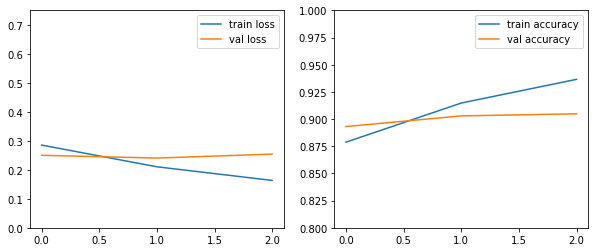

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label="train loss")
plt.plot(history['val_loss'],label="val loss")
plt.ylim([0,0.75])
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['train_acc'],label="train accuracy")
plt.plot(history['val_acc'],label="val accuracy")
plt.ylim([0.8,1])
plt.legend()

# 8.12 Hugging Face Transformers - ELECTRA
- 이번 절에서는 한글로 훈련된 ELECTRA 모델을 받아, KorQuAD 데이터로 Fine-Tuning을 해보자.

## 8.12.5 Fine Tuning - KorQuAD
- https://huggingface.co/docs/transformers/tasks/question_answering

In [ ]:
from datasets import load_dataset
from transformers import ElectraTokenizerFast, ElectraForQuestionAnswering
import transformers
from transformers import DefaultDataCollator

import torch
from torch.utils.data import DataLoader

import numpy as np
import time
from tqdm import tqdm

In [ ]:
max_seq_length = 384  # 최대 token 갯수

batch_size = 16
learning_rate = 0.00001
n_epochs = 3

model_dir = 'korquad-finetuning'

#model_name = "monologg/koelectra-base-v3-discriminator"
model_name = "monologg/koelectra-small-v3-discriminator"""

In [ ]:
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)

Downloading:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/458 [00:00<?, ?B/s]

In [ ]:
korquad_dataset = load_dataset('squad_kor_v1')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60407 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5774 [00:00<?, ? examples/s]

Dataset squad_kor_v1 downloaded and prepared to /root/.cache/huggingface/datasets/squad_kor_v1/squad_kor_v1/1.0.0/18d4f44736b8ee85671f63cb84965bfb583fa0a4ff2df3c2e10eee9693796725. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
korquad_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 60407
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 5774
    })
})

In [ ]:
for i, data in enumerate(korquad_dataset['train']):
    print(i, data)
    if i>=10: break

0 {'id': '6566495-0-0', 'title': '파우스트_서곡', 'context': '1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.', 'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?', 'answers': {'text': ['교향곡'], 'answer_start': [54]}}
1 {'id': '6566495-0-1', 'title': '파우스트_서곡', 'context': '1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과

In [ ]:
def preprocess_function(examples, tokenizer):
    # https://huggingface.co/docs/transformers/tasks/question_answering
    questions = [q.strip() for q in examples["question"]]
    contexts = [q.strip() for q in examples["context"]]
    inputs = tokenizer(
        text = questions,
        text_pair = contexts,
        max_length=max_seq_length,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length")

    offset_mapping = inputs.pop("offset_mapping") # 'offset_mappling' 제거
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i] # {'text': ['교향곡'], 'answer_start': [54]}
        start_char = answer["answer_start"][0]  # 54
        end_char = answer["answer_start"][0] + len(answer["text"][0]) # 57
        sequence_ids = inputs.sequence_ids(i)  # text(0), text_pair(1), [CLS],[SEP]는 None

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:  # None을 만날때 까지
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
korquad_dataset["train"].column_names

['id', 'title', 'context', 'question', 'answers']

In [ ]:
tokenized_korsquad = korquad_dataset.map(lambda ex: preprocess_function(ex,tokenizer),
                                         batched=True, remove_columns=korquad_dataset["train"].column_names)

  0%|          | 0/61 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

In [ ]:
tokenized_korsquad

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 60407
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 5774
    })
})

In [ ]:
for i, data in enumerate(tokenized_korsquad['train']):
    print(data.keys())
    print(data)
    break

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'])
{'input_ids': [2, 29064, 4034, 28889, 4234, 14623, 6334, 4110, 3244, 4219, 6570, 4292, 3063, 4219, 4195, 3771, 4034, 4070, 35, 3, 16095, 4272, 4556, 29064, 4034, 28889, 4234, 14623, 6334, 4292, 6396, 3244, 4219, 2126, 6434, 4073, 6365, 4007, 11666, 3240, 4110, 7402, 4239, 6293, 6272, 4234, 21238, 4292, 3063, 4228, 4034, 2513, 4292, 2022, 4034, 4176, 18, 3240, 6964, 29064, 4034, 16095, 4193, 4556, 4073, 2827, 26774, 10749, 23207, 4141, 4068, 4292, 2348, 1, 6313, 4007, 4118, 11906, 4047, 9837, 4073, 7777, 4398, 6460, 2662, 8463, 4348, 4943, 6944, 4110, 6654, 4034, 14623, 6334, 4234, 19833, 4073, 8345, 4398, 7218, 6217, 18, 6380, 8436, 4073, 4129, 33009, 4116, 4266, 4234, 8228, 4239, 8436, 6836, 4005, 24572, 21319, 4007, 8211, 4279, 4034, 21073, 4234, 21238, 29, 4467, 4292, 2440, 4219, 2146, 4112, 26974, 4292, 2734, 4494, 18781, 16, 6594, 4007, 12208, 21, 4501, 4073, 14623, 6334, 4234, 2914, 4

In [ ]:
ind = 300
data = tokenized_korsquad['train'][ind]
print(korquad_dataset['train'][ind])

print("data shape: ", len(data['input_ids']),len(data['token_type_ids']),len(data['attention_mask']))
print(tokenizer.decode(data['input_ids']))

# answer
print('answer: ')
for k in range(data['start_positions'],data['end_positions']+1):
    print(k, tokenizer._convert_id_to_token(data['input_ids'][k]))

{'id': '6466019-2-0', 'title': '아이스하키', 'context': '아시아리그 아이스하키(Asia League Ice Hockey, ALIH)는 대한민국과 일본, 중화인민공화국 등의 동아시아 지역을 기반으로 한 아시아 최초의 프로 통합 아이스하키 리그이다. 한중일 빙판 삼국지가 벌이는 아시아리그 아이스하키는 한국 세팀(안양 한라, 하이원, 대명 상무) 일본 네팀(오지 이글스, 일본제지 크레인스, 토호쿠 프리블레이즈, 닛코 아이스벅스) 중국 한팀(차이나 드레곤스) 등 총 8 팀이 매시즌 참가한다. 사무국은 일본 동경에 있다. 아시아 버전의 NHL(북미아이스하키리그)라고도 불리는 아시아리그 아이스하키는 지난 2003년 출범하여 지금까지 이어져 오고 있다. 지난 2009-2010 시즌에는 한국팀으로는 사상 처음으로 안양 한라가 우승하기도 했다.', 'question': '아시아 최초의 프로 통합리그의 이름은 무엇인가?', 'answers': {'text': ['아시아리그 아이스하키'], 'answer_start': [0]}}
data shape:  384 384 384
[CLS] 아시아 최초의 프로 통합리그의 이름은 무엇인가? [SEP] 아시아리그 아이스하키 ( Asia League Ice Hockey, ALIH ) 는 대한민국과 일본, 중화인민공화국 등의 동아시아 지역을 기반으로 한 아시아 최초의 프로 통합 아이스하키 리그이다. 한중일 빙판 삼국지가 벌이는 아시아리그 아이스하키는 한국 세팀 ( 안양 한라, 하이원, 대명 상무 ) 일본 네팀 ( 오지 이글스, 일본제지 크레인스, 토호쿠 프리블레이즈, 닛코 아이스벅스 ) 중국 한팀 ( 차이나 드레곤스 ) 등 총 8 팀이 매시즌 참가한다. 사무국은 일본 동경에 있다. 아시아 버전의 NHL ( 북미아이스하키리그 ) 라고도 불리는 아시아리그 아이스하키는 지난 2003년 출범하여 지금까지 이어져 오고 있다. 지난 2009 - 2010 시즌에는 한국팀으로는 사상 처음으로 안양 한라가 우승하기도 했다. 

batch 데이터, Pytorch Tensor로 변환.

In [ ]:
collater = DefaultDataCollator(return_tensors="pt")

train_dl = DataLoader(tokenized_korsquad["train"],shuffle=True,batch_size=batch_size,collate_fn=collater)
test_dl = DataLoader(tokenized_korsquad["validation"],shuffle=False,batch_size=batch_size,collate_fn=collater)

In [ ]:
for i, data in enumerate(train_dl):
    print(i, data['input_ids'].shape, data['attention_mask'].shape, data['token_type_ids'].shape, data['start_positions'].shape, data['end_positions'].shape)
    break

0 torch.Size([16, 384]) torch.Size([16, 384]) torch.Size([16, 384]) torch.Size([16]) torch.Size([16])


### Model 생성
- ElectraForQuestionAnswering

In [ ]:
print(f'model name: {model_name}')
model = ElectraForQuestionAnswering.from_pretrained(model_name)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

model name: monologg/koelectra-small-v3-discriminator


Downloading:   0%|          | 0.00/56.6M [00:00<?, ?B/s]

Some weights of the model checkpoint at monologg/koelectra-small-v3-discriminator were not used when initializing ElectraForQuestionAnswering: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForQuestionAnswering were not initialized from the model checkpoint at monologg/koelectra-small-v3-discriminator and are newly initialized: ['qa_outputs.weigh

In [ ]:
out = model(**data)
out.loss, out.start_logits.shape, out.end_logits.shape

(tensor(6.0302, grad_fn=<DivBackward0>),
 torch.Size([16, 384]),
 torch.Size([16, 384]))

### Model 훈련

In [ ]:
def train_pytorch_model_qa(model,optimizer,train_dl, valid_dl,n_epochs,device):
    s_time = time.time()
    model.to(device)
    history = {'train_loss': [],'val_loss': [], 'train_em': [], 'val_em': [],
               'train_acc_start': [], 'val_acc_start': [],'train_acc_end': [], 'val_acc_end': []}
    n_step = len(train_dl)
    n_step_val = len(valid_dl)
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = []; em = 0; acc_start = 0; acc_end = 0; total = 0
        model.train()
        with tqdm(total=n_step,ncols=120) as pbar:
            for i, data in enumerate(train_dl):
                # get the inputs
                data = {k: v.to(device) for k, v in data.items()}
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                out = model(**data)
                out.loss.backward()
                optimizer.step()

                pred_start = out.start_logits.argmax(axis=-1)
                acc_start  += (pred_start==data['start_positions']).float().sum().item()
                pred_end = out.end_logits.argmax(axis=-1)
                acc_end  += (pred_end==data['end_positions']).float().sum().item()
                em += ((pred_start==data['start_positions']).float() * (pred_end==data['end_positions']).float()).sum().item()

                total += len(data['start_positions'])

                # print statistics
                running_loss.append(out.loss.item())
                pbar.set_description(f'[epoch: {epoch+1}/{n_epochs}] loss: {np.mean(running_loss):.4f}, em: {em/total:.4f}, acc_start: {acc_start/total:.4f}, acc_end: {acc_end/total:.4f}')
                pbar.update(1)
            history['train_acc_start'].append(acc_start/total)
            history['train_acc_end'].append(acc_end/total)
            history['train_em'].append(em/total)
            history['train_loss'].append(np.mean(running_loss))

        running_loss = []; em = 0; acc_start = 0; acc_end = 0; total = 0
        model.eval()
        with torch.no_grad():
            with tqdm(total=n_step_val,ncols=120) as pbar:
                for i, data in enumerate(valid_dl):
                    data = {k: v.to(device) for k, v in data.items()}

                    out = model(**data)
                    pred_start = out.start_logits.argmax(axis=-1)
                    acc_start  += (pred_start==data['start_positions']).float().sum().item()
                    pred_end = out.end_logits.argmax(axis=-1)
                    acc_end  += (pred_end==data['end_positions']).float().sum().item()
                    em += ((pred_start==data['start_positions']).float() * (pred_end==data['end_positions']).float()).sum().item()
                    total += len(data['start_positions'])

                    running_loss.append(out.loss.item())
                    pbar.set_description(f'[validation] val loss: {np.mean(running_loss):.4f}, em: {em/total:.4f}, val_acc_start: {acc_start/total:.4f}, val_acc_end: {acc_end/total:.4f}')
                    pbar.update(1)
                history['val_acc_start'].append(acc_start/total)
                history['val_acc_end'].append(acc_end/total)
                history['val_em'].append(em/total)
                history['val_loss'].append(np.mean(running_loss))

    print('Finished Training')
    return history

base model

In [ ]:
print(f'model name: {model_name}')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')
history = train_pytorch_model_qa(model, optimizer, train_dl, test_dl,n_epochs, device )

device: cuda:0


[epoch: 1/3] loss: 0.8255, em: 0.7201, acc_start: 0.8125, acc_end: 0.7790: 100%|██| 3776/3776 [1:09:35<00:00,  1.11s/it]
[validation] val loss: 0.4588, em: 0.8145, val_acc_start: 0.8822, val_acc_end: 0.8521: 100%|█| 361/361 [02:17<00:00,  2.
[epoch: 2/3] loss: 0.3920, em: 0.8310, acc_start: 0.8972, acc_end: 0.8706: 100%|██| 3776/3776 [1:09:28<00:00,  1.10s/it]
[validation] val loss: 0.4245, em: 0.8291, val_acc_start: 0.8952, val_acc_end: 0.8639: 100%|█| 361/361 [02:16<00:00,  2.
[epoch: 3/3] loss: 0.2829, em: 0.8658, acc_start: 0.9230, acc_end: 0.8990: 100%|██| 3776/3776 [1:09:17<00:00,  1.10s/it]
[validation] val loss: 0.4695, em: 0.8207, val_acc_start: 0.8853, val_acc_end: 0.8561: 100%|█| 361/361 [02:16<00:00,  2.

Finished Training


small model

In [ ]:
print(f'model name: {model_name}')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')
history = train_pytorch_model_qa(model, optimizer, train_dl, test_dl,n_epochs, device )

model name: monologg/koelectra-small-v3-discriminator
device: cuda:0


[epoch: 1/3] loss: 1.9499, em: 0.4599, acc_start: 0.5888, acc_end: 0.5548: 100%|████| 3776/3776 [14:02<00:00,  4.48it/s]
[validation] val loss: 0.9400, em: 0.6846, val_acc_start: 0.7792, val_acc_end: 0.7471: 100%|█| 361/361 [00:27<00:00, 13.
[epoch: 2/3] loss: 0.8630, em: 0.6871, acc_start: 0.7815, acc_end: 0.7509: 100%|████| 3776/3776 [13:54<00:00,  4.53it/s]
[validation] val loss: 0.6707, em: 0.7629, val_acc_start: 0.8346, val_acc_end: 0.8085: 100%|█| 361/361 [00:27<00:00, 13.
[epoch: 3/3] loss: 0.6702, em: 0.7405, acc_start: 0.8229, acc_end: 0.7960: 100%|████| 3776/3776 [13:48<00:00,  4.56it/s]
[validation] val loss: 0.6189, em: 0.7773, val_acc_start: 0.8474, val_acc_end: 0.8209: 100%|█| 361/361 [00:27<00:00, 13.

Finished Training


In [ ]:
model.save_pretrained(model_dir)